# Step 1: Data Loading and Initial Exploration

<H3>1.1. Import Required Libraries</H3>

In [4]:
import pandas as pd

<H3>1.2. Load the Dataset</H3>

In [5]:
df = pd.read_csv('product_reviews_mock_data.csv')

<H3>1.3. Preview the Dataset</H3>

In [6]:
df.head()

,ReviewID,ProductID,UserID,Rating,ReviewText,ReviewDate
0,REV2000,Product_E,User_114,4,fantastic. wonderful experience.,2023-04-17
1,REV2001,Product_C,User_186,2,broke easily. awful.,2023-11-27
2,REV2002,Product_E,User_101,3,met expectations. five stars.,2023-12-10
3,REV2003,Product_A,User_175,5,very satisfied. wonderful experience.,2023-11-10
4,REV2004,Product_C,User_158,1,worst purchase. one star.,2024-05-25


<H3>1.4. Getting Unique names and Total No of Unique Products</H3>

In [7]:
print("unique product names:", df['ProductID'].unique())
print("Total unique products:", df['ProductID'].nunique())

unique product names: ['Product_E' 'Product_C' 'Product_A' 'Product_D' 'Product_B']
Total unique products: 5


<H3>1.5. Counting of Reviews per Product</H3>

In [8]:
print("Count of Reviews per Product:\n",df['ProductID'].value_counts().sort_index())

Count of Reviews per Product:
 ProductID
Product_A    204
Product_B    188
Product_C    207
Product_D    217
Product_E    184
Name: count, dtype: int64


<H3>1.6. Data Types</H3>

In [9]:
df.dtypes

ReviewID      object
ProductID     object
UserID        object
Rating         int64
ReviewText    object
ReviewDate    object
dtype: object

<H3>1.7. Check the Shape and Columns</H3>

In [10]:
print('Shape:', df.shape)
print('Column:', df.columns.tolist())

Shape: (1000, 6)
Column: ['ReviewID', 'ProductID', 'UserID', 'Rating', 'ReviewText', 'ReviewDate']


<H3>1.8.  Check for Missing Values</H3>

In [11]:
df.isnull().sum()

ReviewID      0
ProductID     0
UserID        0
Rating        0
ReviewText    0
ReviewDate    0
dtype: int64

<H3>1.9.  Explore Ratings Distribution</H3>

In [12]:
df['Rating'].value_counts().sort_index()

Rating
1    196
2    202
3    202
4    206
5    194
Name: count, dtype: int64

<H3>1.10.  Convert ReviewDate to Datetime Format</H3>

In [13]:
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])

<H3>1.11. Check the Time Range</H3>

In [14]:
print(f"Date range: {df['ReviewDate'].min()}   to   {df['ReviewDate'].max()}")

Date range: 2023-01-01 00:00:00   to   2024-12-30 00:00:00


Getting the starting and ending dates

In [15]:
print("Start Date: ",df['ReviewDate'].min())
print("End Date: ", df['ReviewDate'].max())

Start Date:  2023-01-01 00:00:00
End Date:  2024-12-30 00:00:00


Listing all unique review dates (optional)

In [16]:
# unique_dates = df['ReviewDate'].sort_values().unique()
# print(unique_dates)

Listing all unique review dates as strings instead of datetime objects (optional)

In [17]:
# unique_dates_str = df['ReviewDate'].dt.strftime('%Y-%m-%d').sort_values().unique()
# print(unique_dates_str)

<H3>1.12. Check One Example Per Sentiment Type</H3>

In [18]:
print(f"Positive Review Example: \n{df[df['Rating'] == 5].iloc[0]['ReviewText']}")
print(f"\nNeutral Review Example: \n{df[df['Rating'] == 3].iloc[0]['ReviewText']}")
print(f"\nNegative Review Example: \n{df[df['Rating'] == 1].iloc[0]['ReviewText']}")

Positive Review Example: 
very satisfied. wonderful experience.

Neutral Review Example: 
met expectations. five stars.

Negative Review Example: 
worst purchase. one star.


<H3>1.13. Group Reviews by Year-Month Format</H3>

In [20]:
# Create a new column for Year-Month
df['YearMonth'] = df['ReviewDate'].dt.to_period('M').astype(str)

# Group and count reviews per Year-Month
monthly_counts = df.groupby('YearMonth')['ReviewID'].count()
print(monthly_counts)

YearMonth
2023-01    44
2023-02    34
2023-03    51
2023-04    47
2023-05    52
2023-06    42
2023-07    36
2023-08    40
2023-09    47
2023-10    45
2023-11    31
2023-12    44
2024-01    47
2024-02    39
2024-03    40
2024-04    41
2024-05    47
2024-06    40
2024-07    42
2024-08    30
2024-09    40
2024-10    44
2024-11    37
2024-12    40
Name: ReviewID, dtype: int64


<H3>1.14. Plot Reviews per Year-Month</H3>

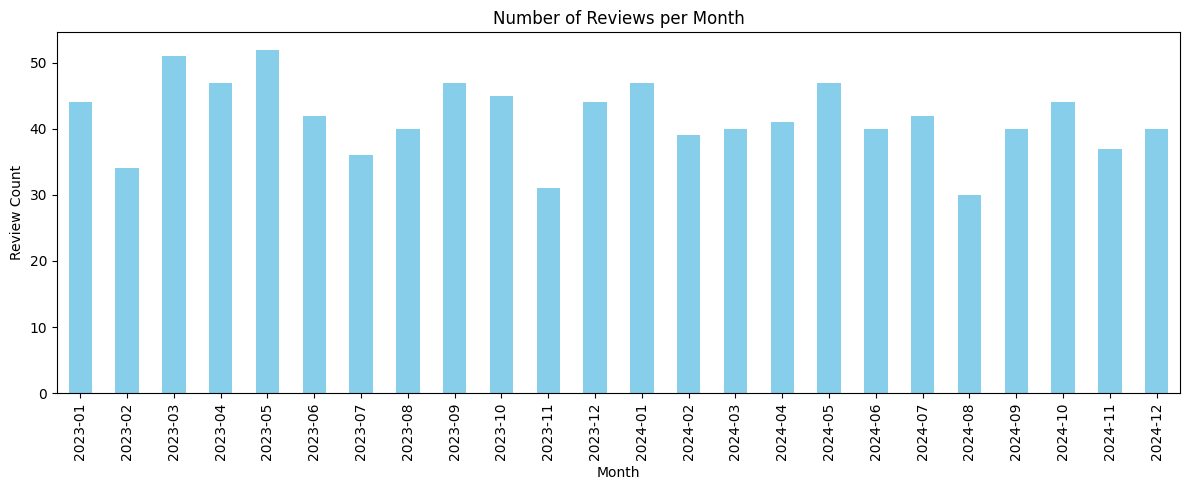

In [21]:
import matplotlib .pyplot as plt
monthly_counts.plot(kind='bar', figsize=(12,5), color = 'skyblue')
plt.title('Number of Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.tight_layout()
plt.show()

# Step 2: Text Preprocessing

2.1. Import Required Libraries

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

2.2: Download NLTK Data

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

2.3: Define Text Cleaning Function

In [2]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation, numbers
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

2.4: Apply Cleaning to Review Text

In [22]:
df['CleanReview'] = df['ReviewText'].apply(clean_text)
df[['ReviewText', 'CleanReview']].head()

,ReviewText,CleanReview
0,fantastic. wonderful experience.,fantastic wonderful experience
1,broke easily. awful.,broke easily awful
2,met expectations. five stars.,met expectation five star
3,very satisfied. wonderful experience.,satisfied wonderful experience
4,worst purchase. one star.,worst purchase one star


# Step 3: Sentiment Analysis

Goal is to Classify each review as Positive, Negative, or Neutral using a pre-trained sentiment analyzer.

<H3>3.1 Install and Import VADER (Sentiment Analyzer)</H3>

In [23]:
# if not install already
# !pip install vadersentiment

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

<H3>3.2 Apply Sentiment Analysis</H3>

In [26]:
# Define a function to classify sentiment
def get_sentiment_label(text):
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
# Apply to Dataframe
df['Sentiment'] = df['ReviewText'].apply(get_sentiment_label)

# Show a preview
df[['ReviewText', 'Sentiment']].head()

,ReviewText,Sentiment
0,fantastic. wonderful experience.,Positive
1,broke easily. awful.,Negative
2,met expectations. five stars.,Neutral
3,very satisfied. wonderful experience.,Positive
4,worst purchase. one star.,Negative


<H3>3.3: View Sentiment Score for Debugging</H3>

In [27]:
# Add VADER score breakdown
df['SentimentScore'] = df['ReviewText'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df[['ReviewText', 'Sentiment', 'SentimentScore']].head()

,ReviewText,Sentiment,SentimentScore
0,fantastic. wonderful experience.,Positive,0.8074
1,broke easily. awful.,Negative,-0.5267
2,met expectations. five stars.,Neutral,0.0000
3,very satisfied. wonderful experience.,Positive,0.7947
4,worst purchase. one star.,Negative,-0.6249


<H3>3.4 Summary Counts</H3>

In [28]:
df['Sentiment'].value_counts()

Sentiment
Positive    508
Negative    456
Neutral      36
Name: count, dtype: int64

# Step 4: Exploratory Data Analysis (EDA) of Sentiments

<H3>4.1 – Sentiment Distribution Bar Plot</H3>

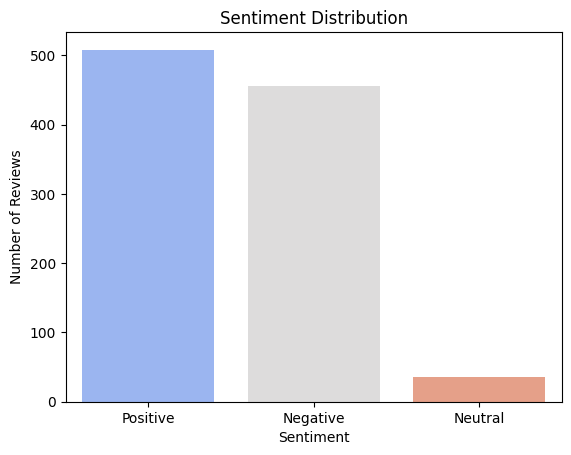

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count Sentiments
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='coolwarm', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

<H3>4.2 – Sentiment by Rating</H3>

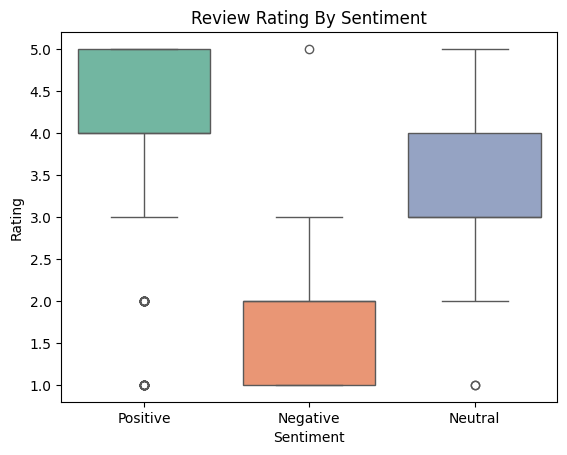

In [33]:
# Cross tab sentiment and rating
sns.boxplot(data=df, x='Sentiment', y='Rating', hue='Sentiment', palette='Set2', legend=False)
plt.title('Review Rating By Sentiment')
plt.ylabel('Rating')
plt.xlabel('Sentiment')
plt.show()

<H3>4.3 – Word Clouds</H3>

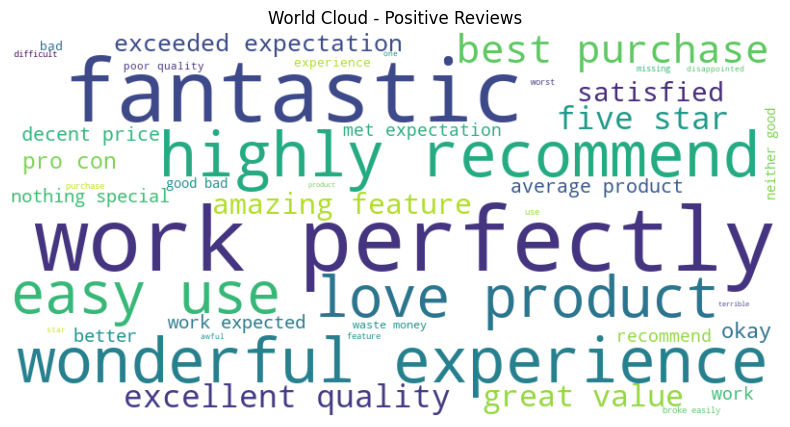

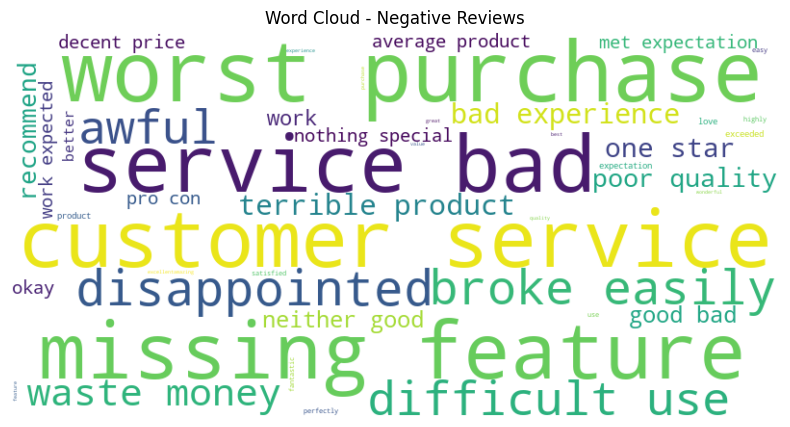

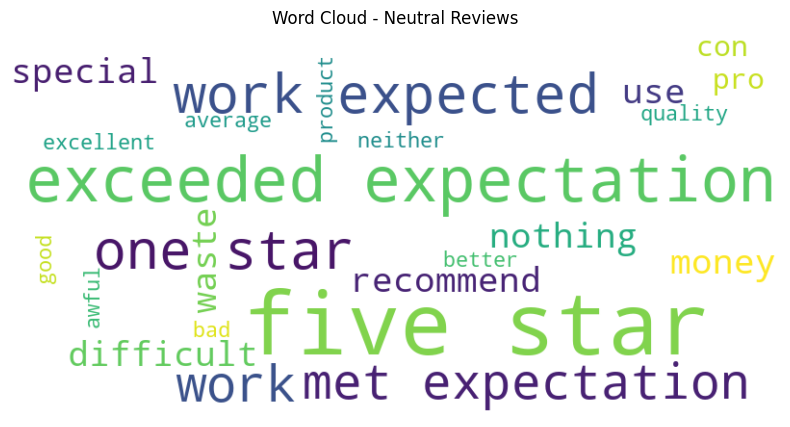

In [37]:
from wordcloud import WordCloud

# For positive Sentiments

positive_text = " ".join(df[df['Sentiment'] == 'Positive']['CleanReview'])
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('World Cloud - Positive Reviews')
plt.show()

# Negative
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['CleanReview'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews")
plt.show()

# Neutral
neutral_text = " ".join(df[df['Sentiment'] == 'Neutral']['CleanReview'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Neutral Reviews")
plt.show()


<H3>4.4: Time-Based Sentiment Trends</H3>

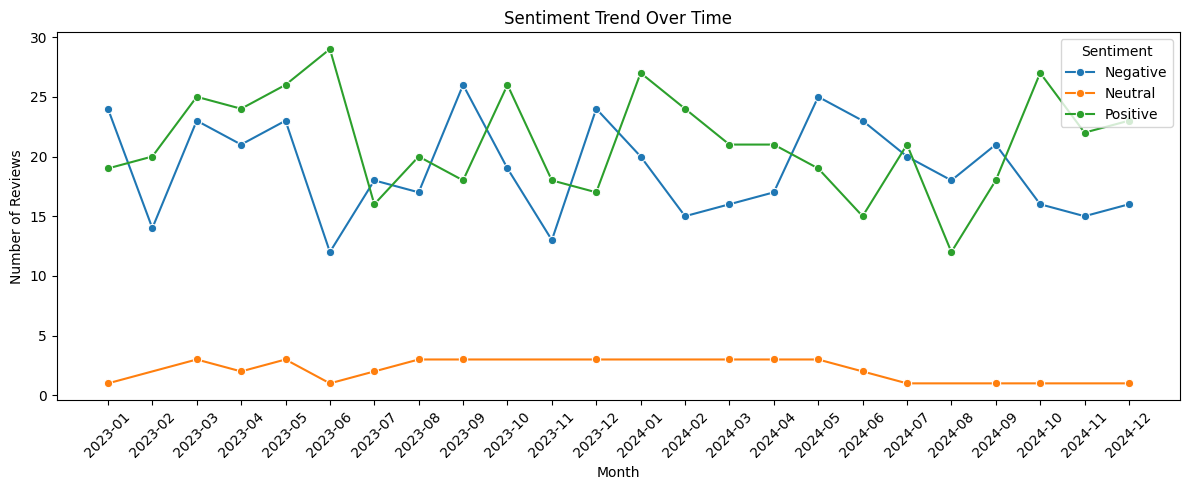

In [38]:
# Monthly Sentiment Trend Line Chart
# Group by year-month and sentiment
df['YearMonth'] = df['ReviewDate'].dt.to_period('M').astype(str)

sentiment_trend = df.groupby(['YearMonth', 'Sentiment']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=sentiment_trend, x='YearMonth', y='Count', hue='Sentiment', marker='o')
plt.title("Sentiment Trend Over Time")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

<H3>4.5: Sentiment by Product</H3>

1. Sentiment Distribution by Product

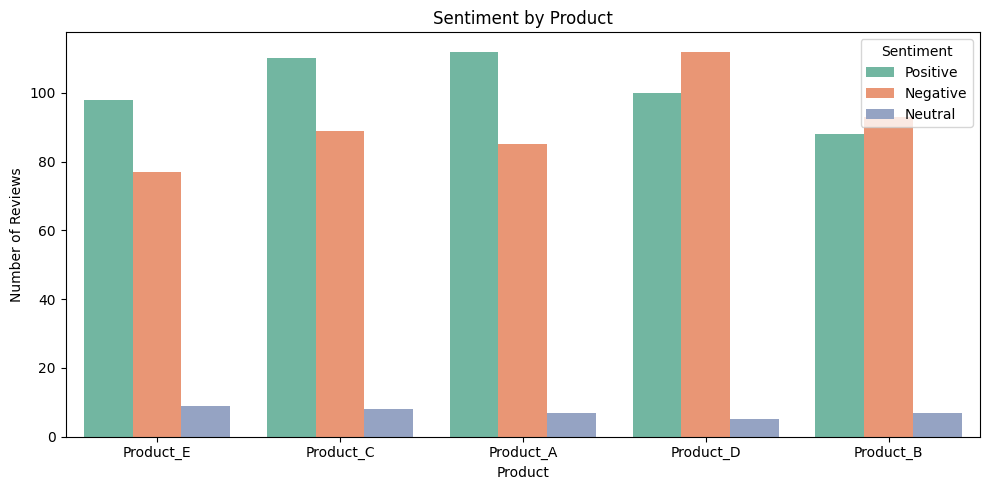

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='ProductID', hue='Sentiment', palette='Set2')
plt.title("Sentiment by Product")
plt.xlabel("Product")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

2. Average Sentiment Score per Product

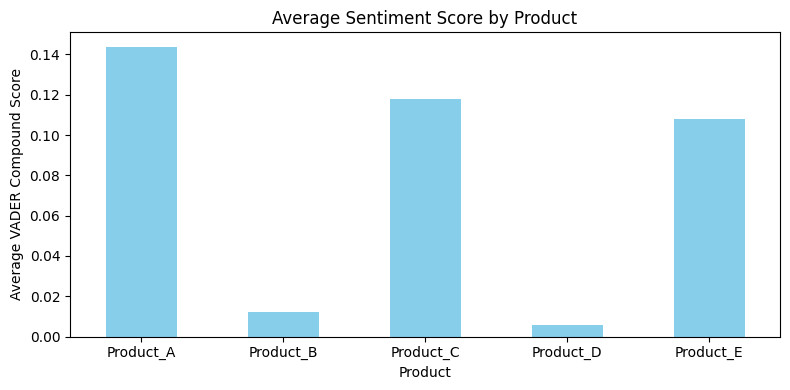

In [40]:
df.groupby('ProductID')['SentimentScore'].mean().plot(kind='bar', color='skyblue', figsize=(8, 4))
plt.title("Average Sentiment Score by Product")
plt.ylabel("Average VADER Compound Score")
plt.xlabel("Product")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 5: Topic Modeling (with LDA)

5.1: Install Required Libraries
- pip install scikit-learn
- pip install gensim

<H3>5.2: Focus on Negative Reviews</H3>

In [42]:
negative_reviews = df[df['Sentiment'] == 'Negative']['CleanReview']

For All Reviews

In [43]:
all_reviews = df['CleanReview']

<H3>5.3: Vectorize Text (TF-IDF or Count)</H3>

For Negative Reviews

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
X = vectorizer.fit_transform(negative_reviews)  # or all_reviews

For All Reviews

In [47]:
# Vectorize
vectorizer_all = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
X_all = vectorizer_all.fit_transform(all_reviews) 

<H3>5.4: Run LDA</H3>

For Negative Reviews

In [45]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

For All Reviews

In [49]:
lda_all = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda_all.fit(X_all)

LatentDirichletAllocation(n_components=5, random_state=42)

<H3>5.5: Display Top Words per Topic</H3>

For Negative Reviews

In [ ]:
def display_topics(model, feature_names, no_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}: ", " | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Show top words
display_topics(lda, vectorizer.get_feature_names_out())

Topic 1:  bad | purchase | worst | good | experience | better | disappointed | expectation | okay | pro
Topic 2:  use | difficult | quality | poor | disappointed | okay | recommend | pro | average | awful
Topic 3:  awful | star | decent | price | recommend | pro | broke | easily | worst | purchase
Topic 4:  bad | product | customer | service | terrible | work | broke | easily | experience | expected
Topic 5:  feature | missing | money | waste | met | expectation | disappointed | okay | better | work


For All Reviews

In [52]:
# Show top words
display_topics(lda_all, vectorizer_all.get_feature_names_out())

Topic 1:  work | purchase | perfectly | worst | use | best | easy | expected | star | fantastic
Topic 2:  wonderful | experience | waste | money | great | value | quality | excellent | fantastic | decent
Topic 3:  bad | recommend | highly | experience | service | customer | disappointed | awful | good | satisfied
Topic 4:  feature | expectation | missing | easily | broke | amazing | use | exceeded | met | difficult
Topic 5:  product | star | love | quality | terrible | poor | average | pro | use | disappointed
